In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

[1, -8, 4, 16]


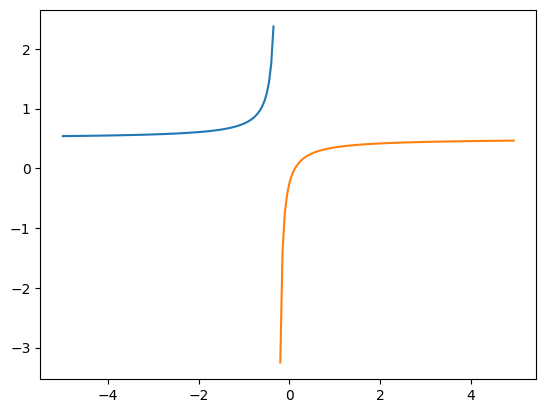

In [2]:
c1 = [[-1,0],[1,1]]
c1_len = len(c1)
c2 = [[2,0],[1,-2]]
c2_len = len(c2)
c = c1 + c2
K = [0,0,0,0]

def addFunc(arr, corr):
    for i in range(len(K)):
        if corr == 1:
            K[i] = K[i] + arr[i]
        if corr == -1:
            K[i] = K[i] - arr[i]

def getFuncRes(x):
    return K[0] + K[1] * x[0] + K[2] * x[1] + K[3] * x[0] * x[1]

def new_potential(x):
    arr = []
    arr.append(1)
    arr.append(4 * x[0])
    arr.append(4 * x[1])
    arr.append(16 * x[0] * x[1])
    return arr

corr = 1
while(corr != 0):
    for i in range(len(c)):
        addFunc(new_potential(c[i]), corr)
        temp_res = getFuncRes(c[(i+1) % len(c)])
        if((i+1 < c1_len) & (temp_res <= 0)):
            corr = 1
        else:
            if((((i+1) % len(c)) >= c1_len) & (temp_res > 0)):
                corr = -1
            else:
                corr = 0

print(K)

if(K[3] != 0):
    extend_x = -K[2]/K[3]

    x1 = np.arange(-5, extend_x - 0.05, 0.05)
    y1 = (-K[0] - K[1] * x1)/(K[2] + K[3] * x1)

    x2 = np.arange(extend_x + 0.05, 5, 0.05)
    y2 = (-K[0] - K[1] * x2)/(K[2] + K[3] * x2)

    plt.plot(x1, y1)
    plt.plot(x2, y2)
else:
    x1 = np.arange(-5, 5, 0.05)
    y1 = (-K[0] - K[1] * x1)/(K[2] + K[3] * x1)
    plt.plot(x1, y1)

plt.show()

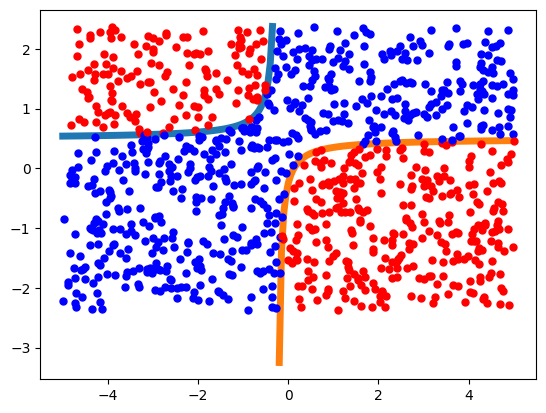

In [3]:

if(K[3] != 0):
    extend_x = -K[2]/K[3]

    x1 = np.arange(-5, extend_x - 0.05, 0.05)
    y1 = (-K[0] - K[1] * x1)/(K[2] + K[3] * x1)

    x2 = np.arange(extend_x + 0.05, 5, 0.05)
    y2 = (-K[0] - K[1] * x2)/(K[2] + K[3] * x2)

    maxY = max(y1.max(), y2.max())

    plt.plot(x1, y1, linewidth='5')
    plt.plot(x2, y2, linewidth='5')
else:
    x1 = np.arange(-5, 5, 0.05)
    y1 = (-K[0] - K[1] * x1)/(K[2] + K[3] * x1)
    maxY = y1.max()
    plt.plot(x1, y1, linewidth='5')

for i in range(1000):
	for q in range(2):
		pointx = random.random() * 10 - 5
		pointy = random.random() * maxY * 2 - maxY
	temp_res = getFuncRes([pointx, pointy])
	if(temp_res > 0):
		plt.plot([pointx], [pointy], marker = 'o', mfc = 'b' , mec = 'b', ms = 5)
	else:
		if(temp_res < 0):
			plt.plot([pointx], [pointy], marker = 'o', mfc = 'r' , mec = 'r', ms = 5)
		else:
			plt.plot([pointx], [pointy], marker = 'o', mfc = 'g' , mec = 'g', ms = 5)


plt.show()